In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("cleaned_data.csv")
df = data.copy()
print(df.shape)
df.head()

(531, 44)


,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0,28,19.3,78,22,10.48,5,7.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,36,24.9,74,20,11.70,5,11.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,33,25.3,72,18,11.80,5,10.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,37,29.7,72,20,12.00,5,4.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,25,20.1,72,18,10.00,5,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
df.describe()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,...,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,0.322034,31.435028,24.312806,73.476460,19.237288,11.154765,4.939736,7.675518,0.386064,0.288136,...,0.199623,0.024482,0.077213,0.003766,0.246704,0.030132,0.382298,0.035782,0.274953,0.725047
std,0.467696,5.427830,4.083292,2.705151,1.695778,0.866853,1.495951,4.814185,0.487305,0.693522,...,0.400094,0.154686,0.267181,0.061314,0.431500,0.171111,0.486407,0.185920,0.446912,0.446912
min,0.000000,20.000000,12.400000,70.000000,16.000000,8.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.500000,21.600000,72.000000,18.000000,10.500000,5.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,24.200000,72.000000,18.000000,11.000000,5.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,26.700000,74.000000,20.000000,11.700000,5.000000,10.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,48.000000,38.900000,82.000000,28.000000,14.800000,12.000000,30.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.keys()

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)',
       'Hb(g/dl)', 'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+',
       'Blood Group_AB-', 'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+',
       'Blood Group_O-', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular'],
      dtype='object')

In [7]:
# dependent variable
y= df['PCOS (Y/N)']
# independent variable
x= df.drop(['PCOS (Y/N)'], axis=1) 
# splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# Logistic Regression

In [8]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-0.00051802]
The coefficient b1=  [[-2.71881272e-02  9.29270907e-02 -1.02631116e-02 -5.92715742e-03
   4.36576957e-03 -4.95792137e-02 -2.29605125e-03 -5.04478487e-03
  -7.06007579e-03 -5.52987755e-05  5.47955901e-04 -8.44887153e-04
  -7.21345681e-04 -8.87750083e-03  6.54338515e-02  9.08014808e-03
  -6.17172730e-03 -5.50708799e-02  1.05771217e-02  3.94322912e-02
   3.76945671e-02  4.12677313e-02  1.41195095e-02  3.03228596e-02
   3.47431718e-02  5.94184395e-03 -5.07715586e-02 -1.10736992e-02
   2.40915084e-01  3.09146348e-01 -2.04252360e-03  1.37385618e-03
   5.58340645e-03 -3.45918441e-04 -9.04906930e-04  2.70495581e-03
  -8.07807702e-04 -2.60389197e-03  1.19814499e-03  5.79732597e-04
  -3.38136191e-04  3.27134959e-02 -3.32313237e-02]]


In [9]:
#Make prediction for the test data
y_pred= modelLogistic.predict(x_test)

[[68  6]
 [10 23]]


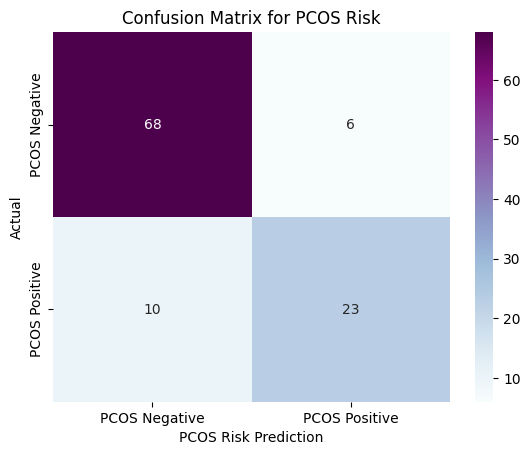

In [10]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [11]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.8504672897196262


In [13]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred)
print(score)

0.8079443079443079


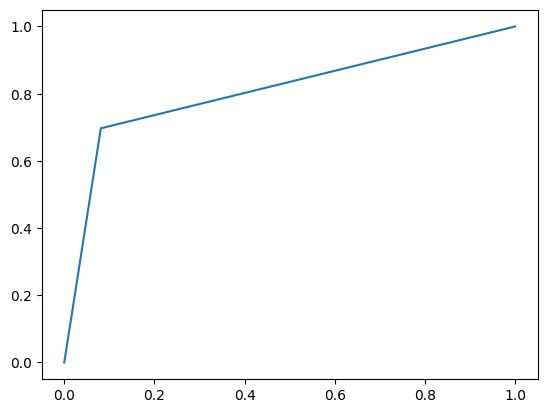

In [14]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

## Logistic Regression (with GridSearch CV hyperparameter tuning)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [15]:
# l1 = lasso (performs some form of feature selection), l2 = ridge (prevents overfitting by preventing assigning too much importance to a single feature, generalisation), elasticnet = lasso + ridge
params = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],   # Used to specify the norm used in the penalization.
    'C' : np.logspace(-4, 4, 20),                      # Inverse of regularization strength; must be a positive float.
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],  # Algorithm to use in the optimization problem.
    'max_iter' : [100, 1000,2500, 5000]                # Maximum number of iterations taken for the solvers to converge.
    }
]

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
clf = GridSearchCV(estimator = modelLogistic, param_grid = params, scoring = 'accuracy', cv = 3, verbose=True, n_jobs=-1)
# cv --> Determines the cross-validation splitting strategy
# verbose --> Controls the verbosity. Verbose is a general programming term for produce lots of logging output, can think of it as asking the program to "tell me everything about what you are doing all the time". 
# n_jobs --> Number of jobs to run in parallel. `-1` means using all processors. 

In [18]:
clf_fit = clf.fit(x,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [20]:
clf_fit.best_estimator_

LogisticRegression(C=np.float64(0.08858667904100823), solver='newton-cg')

In [21]:
clf_fit.score(x,y)

0.9227871939736346

In [22]:
clf_fit.best_score_

np.float64(0.8888888888888888)

In [23]:
# show best parameters
clf_fit.best_params_


{'C': np.float64(0.08858667904100823),
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

### Fit Logistic regression with best parameters

In [24]:
final_model = LogisticRegression(penalty = clf_fit.best_params_['penalty'], C=clf_fit.best_params_['C'], max_iter=clf_fit.best_params_['max_iter'], solver=clf_fit.best_params_['solver'])
final_model.fit(x_train, y_train)

print("The intercept b0= ", final_model.intercept_)

print("The coefficient b1= ", final_model.coef_)

The intercept b0=  [-1.83880919]
The coefficient b1=  [[-1.48525330e-02  6.44406672e-02  1.52348569e-02 -5.79450055e-02
   1.11736186e-02 -1.27661664e-01 -4.42464742e-02 -1.11946220e-01
  -1.99991503e-01 -3.88283284e-05  3.50858714e-04 -1.98960472e-03
  -1.60934979e-02 -1.96617011e-03  4.13754987e-02  9.68743063e-03
  -1.88242456e-02 -1.40396909e-01  7.03728330e-03  6.04268355e-01
   6.75086073e-01  6.54672119e-01  1.46827224e-01  5.20674972e-01
   3.99569810e-01  1.70890893e-01 -3.35525384e-02 -6.99730928e-03
   1.48119722e-01  3.47479562e-01 -1.50025071e-02  9.07821869e-03
  -3.05738709e-03 -2.46725179e-02 -5.29697536e-02  1.41059149e-02
  -2.68296357e-02  1.73145743e-02  1.41890873e-01 -3.14348664e-03
  -6.56723755e-02  3.81691381e-01 -3.81667788e-01]]


In [25]:
#Make prediction for the test data
y_pred= final_model.predict(x_test)

[[70  4]
 [ 9 24]]


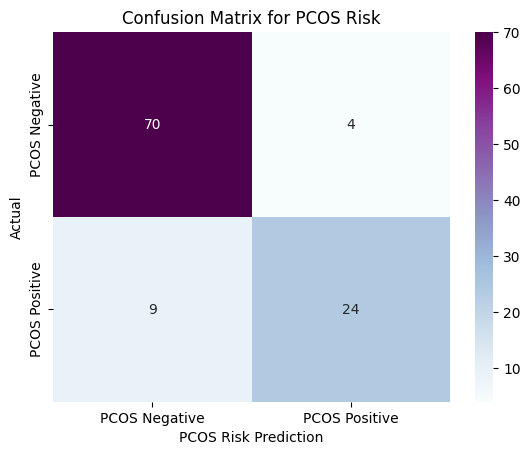

In [26]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.8785046728971962


In [28]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred)
print(score)

0.8366093366093367


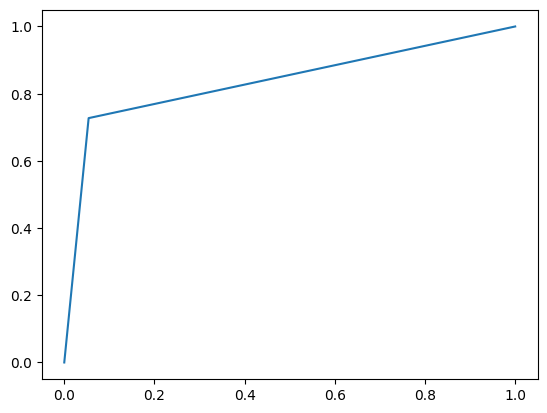

In [29]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

In [30]:
# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Precision: 0.8571428571428571
Recall: 0.7272727272727273
F1 Score: 0.7868852459016393


Slight improvement in AUC-ROC score with GridSearchCV hyperparameter tuning
- Check performance with K-fold cross validation